```{image} ncpi-logo.svg
:height: 75px
:class: analytics-logo
```

# NCPI Dataset Catalog User Analytics - September vs August 2024

This section displays metrics collected from Google Analytics for the NCPI Dataset Catalog at https://anvilproject.org/ncpi/data and compares September 2024 with the previous month (August 2024). The generation of this report is now coded in Jupyter notebooks and can be rerun easily and modified or consolidated as desired.

### Key to tables

On the tables:

* Diffs, e.g. <span style="color: green">(+19.04%)</span> or <span style="color: red">(-12.03%)</span>, compare the later month with the previous month.
* "+" Indicates the entry is new in the report in the current month.
* "↑" Indicates the entry has moved up in rank since the last month.
* "↓" Indicates the entry has moved down in rank since the last month.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install google_auth_oauthlib 
# !pip install install google-api-python-client
# !pip install pandas 
# !pip install numpy
# !pip install matplotlib
# !pip install google-cloud-bigquery
# !pip install db-dtypes

# Analytics package:
# !pip install -e "git+https://github.com/DataBiosphere/data-browser.git@5042e623bfe6ad8404be5f60e1ddb3c0e8e7d6b3#egg=analytics&subdirectory=analytics/hdgar-book/analytics_package"

In [3]:
from IPython.display import display
import pandas as pd
import analytics.charts as ac

%load_ext autoreload
%autoreload 2

import analytics_ncpi as ncpi

SECRET_NAME = 'ANVIL_ANALYTICS_REPORTING_CLIENT_SECRET_PATH'
GA_PROPERTY = "367350417" # NCPI Dataset Catalog - GA4
ANALYTICS_START = "2021-01-01"
TODAY = 'today'
PERIOD = "2024-09"
PREV_PERIOD = "2024-08"

GA3_END = "2023-04-30"
GA4_START = "2023-05-01"

In [4]:
default_params_catalog = {
    "service_system": ac.authenticate_ga4(SECRET_NAME),
    "property": GA_PROPERTY,
    "index_key_formatter": ncpi.adjust_table_index_key,
    "period": PERIOD,
    "prev_period": PREV_PERIOD
}

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=526897014808-dq9pt3bmnutqqjdvj1f5roflpgcvqmpt.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8082%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fanalytics.readonly&state=e9q01MAvGAqNqFF2x1tzM7U4Et7o9Z&access_type=offline


In [5]:
ac.init_tables()

In [6]:
# ga3_service_system = ac.authenticate_ga(SECRET_NAME)

In [7]:
# ga3_users_over_time_params = {
#     "start_date": ANALYTICS_START,
#     "end_date": GA3_END,
#     "service_system": ga3_service_system,
#     "property": "207946923",
#     "segment": "gaid::AttTM8T1QayBj8e_6pZgnA"
# }
# 
# ncpi.save_ga3_users_over_time_data({}, {"filters": "ga:pagePath=~^/ncpi/data(?:$|[/?#])"}, **ga3_users_over_time_params)

## Monthly Users and Page Views (All Time)

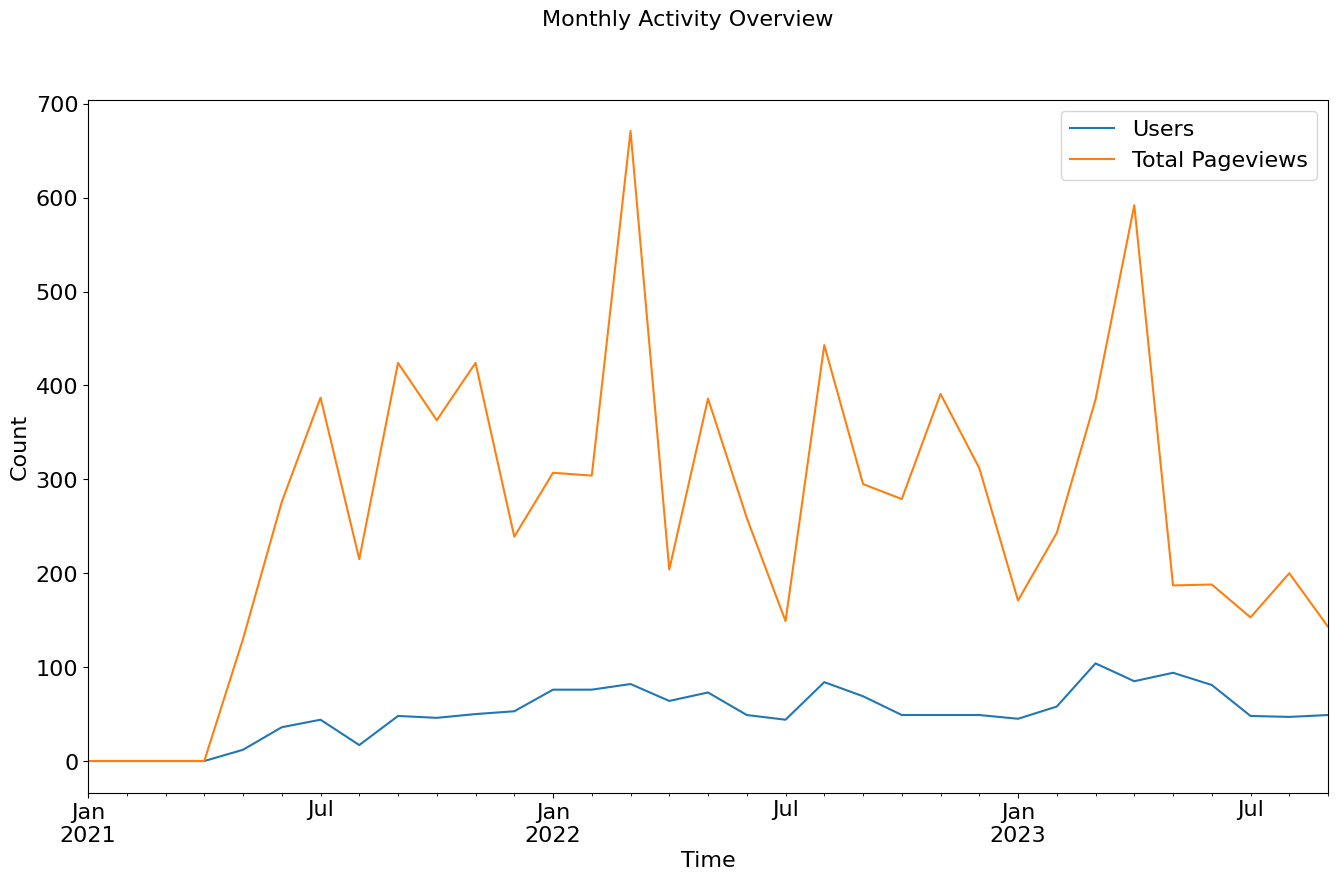

In [8]:
users_over_time_table = ncpi.plot_users_over_time(start_date=GA4_START, end_date=TODAY, split_vertical=[38], **default_params_catalog)

In [9]:
display(users_over_time_table)

## Users and Sessions
Users are distinguished based on a tracking cookie set by Google. Because cookies may not remain present over time or between devices, it's likely that total users are overcounted and returning users are undercounted.

In [10]:
ac.show_difference_table("Total Users", None, "totalUsers", None, **default_params_catalog)

In [11]:
ac.show_difference_table("Returning Users", None, "totalUsers", None, dimension_filter="newVsReturning==returning", **default_params_catalog)

In [12]:
ac.show_difference_table("Total Visits", None, "sessions", None, **default_params_catalog)

## Page Views

In [13]:
ac.show_difference_table("Total", None, "screenPageViews", None, **default_params_catalog)

## Device Category

In [14]:
ac.show_difference_table(["Users", "Percentage of users"], "Category", "totalUsers", "deviceCategory", percentage_metrics={"totalUsers"}, **default_params_catalog)

## Top Countries

In [ ]:
ac.show_difference_table("Users", "Country", "totalUsers", "country", **default_params_catalog)

<div style="page-break-after: always"></div>

## Social Network Referrers

In [ ]:
ac.show_difference_table("User Sessions", "Social Network", "sessions", "sessionSource", dimension_filter="sessionDefaultChannelGroup=@Organic Social", **default_params_catalog)

## Top Referrers

In [16]:
ac.show_difference_table("User Sessions", "Source Host", "sessions", "sessionSource", **default_params_catalog)

## Top Pages

In [19]:
ac.show_difference_table("Page Views", "Page", "screenPageViews", "pagePath", **default_params_catalog)

<div style="page-break-after: always"></div>

## Top Landing Pages

In [20]:
ac.show_difference_table("Entrances", "Page", "sessions", "landingPage", **default_params_catalog)

## Outbound Links to Terra

### Terra Login

In [21]:
ac.show_difference_table("Count", "URL", "eventCount", "linkUrl", dimension_filter="linkUrl=~^https://anvil.terra.bio/(?:\\#workspaces)?$", **default_params_catalog)
# NOTE: this will actually include terra workspace links, since the fragment isn't reported, so the heading above is hidden

### Terra Workspaces
The following Terra workspaces were navigated to from the AnVIL portal.

In [22]:
# ac.show_difference_table("Count", "Workspace", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension1==Workspace", **default_params)
# TODO

## Outbound Links to dbGap
### Top Studies

In [23]:
ac.show_difference_table("Count", "URL", "eventCount", "linkUrl", dimension_filter="linkUrl=~^https://www\\.ncbi\\.nlm\\.nih\\.gov/projects/gap/cgi-bin/study\\.cgi\\?study_id=", **default_params_catalog)

## Outbound Links to Dockstore
### Links to Dockstore Organization Page

In [24]:
# ac.show_difference_table("Count", "URL", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension3==https://dockstore.org/organizations/anvil", **default_params)
# TODO?

### Top References

In [25]:
# ac.show_difference_table("Count", "URL", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension1==Reference;ga:dimension2==Dockstore", **default_params)
# TODO?

## Outbound Links to Gen3
### Links to Gen3 Data Browser

In [26]:
ac.show_difference_table("Count", "URL", "eventCount", "linkUrl", dimension_filter="linkUrl=~^https://gen3\\.theanvil\\.io(?:/.*)?", **default_params_catalog)

## Outbound Links to Tools

In [27]:
# ac.show_difference_table("Count", "Tool", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension1==Tool", **default_params)
# TODO

## Outbound Links to General Resources (NIH/NHGRI)

In [28]:
# ac.show_difference_table("Count", ["NIH/NHGRI", "URL"], "ga:hits", ["ga:dimension2", "ga:dimension3"], filters="ga:eventCategory==External Link;ga:dimension1==Reference;ga:dimension2=~NIH|NHGRI", **default_params)
# TODO

## Outbound Links to Data Consortia

In [29]:
# ac.show_difference_table("Count", "Consortia", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==External Link;ga:dimension1==Data Consortium", **default_params)
# TODO

## Data Dashboard
### Top Facet Terms

In [30]:
# ac.show_difference_table("Count", ["Term Name", "Facet"], "ga:hits", ["ga:eventLabel", "ga:dimension5"], filters="ga:eventCategory==Search;ga:eventAction==Select", **default_params)

### Top Text Searches

In [31]:
# ac.show_difference_table("Count", "Text Input", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Search;ga:eventAction==Enter Text;ga:eventLabel=~.{3\\,}", **default_params)

## Site Search
### Top Text Searches

In [32]:
# ac.show_difference_table("Count", "Text Input", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Site Search;ga:eventAction==Search;ga:eventLabel=~.{3\\,}", **default_params)

### Top Search Click Throughs

In [33]:
# ac.show_difference_table("Count", "Clicked Search Result", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Site Search;ga:eventAction==Select Search Result", **default_params)